# Tuning Q-Learning agent

### **Hyperparameter Tuning Strategy**

This notebook outlines the strategy for hyperparameter tuning for both SARSA and Q-Learning agents. The goal is to systematically optimize the parameters to achieve the best possible performance.

#### **Step 1: GLEI Strategy and Epsilon Selection**
- We first decide whether to use a **GLEI** strategy or not.
- For this step, we test various values of $\epsilon$, such as $\epsilon$ = 0.01, $\epsilon$ = 0.1, and $\epsilon$ = 0.3.
- The results are evaluated based on the agent's performance, and the best epsilon value and GLEI usage are fixed for further tuning.

#### **Step 2: Alpha and Gamma Search**
- After fixing the use of GLEI and the best epsilon value, we proceed to search for the optimal values of $\alpha$ (learning rate) and $\gamma$ (discount factor).
- Multiple combinations of $\alpha$ and $\gamma$ are tested to identify the configuration that maximizes agent performance.

#### **Best Hyperparameters**
- The best hyperparameters for **Q-Learning** are similar to those for **SARSA**. The grid search highlights that the best set of parameter for **Q-Learning** is:
    * Use GLEI strategy
    * starting epsilon: 0.01 (or 0.005)
    * alpha: 0.1
    * gamma: 1
- This demonstrates consistency in the effectiveness of the chosen parameters across both methods.

#### **Results Visualization**
The results of the tuning process are saved and visualized to clearly show the impact of different hyperparameter configurations on agent performance.

## 0. Libraries

In [5]:
import gymnasium as gym
import numpy as np
from agents.qlearning import QLearning
from src.utils.encoding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json

## 1. Testing agent

## 2. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

Dictionary saved to ./data/q_learning/glei_vs_noglei


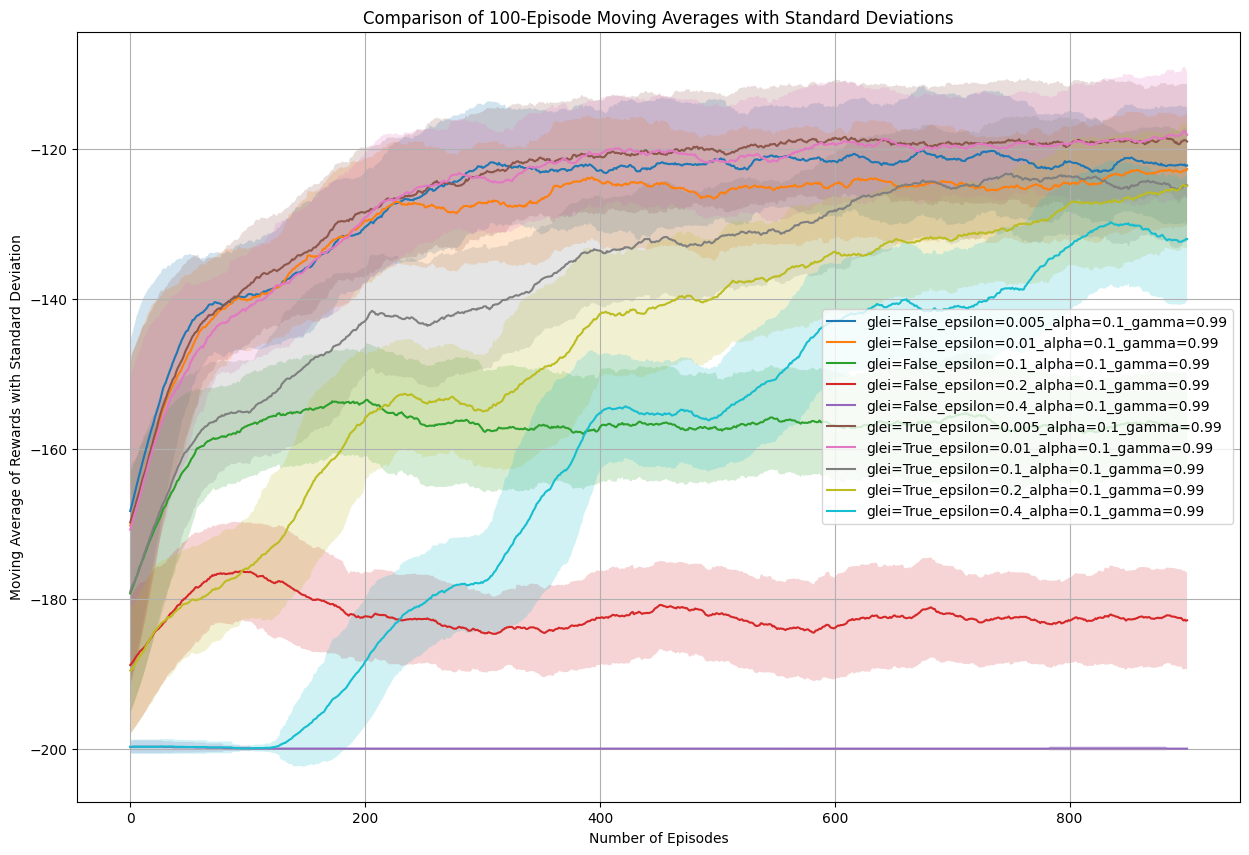

In [3]:
glei_agent = QLearningAgent(env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding)
glei_agent.grid_search(
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)

no_glei_agent = QLearningAgent(env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding)
no_glei_agent.grid_search(
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
)

data_dict = {**no_glei_agent.tune_historic, **glei_agent.tune_historic}
process_json("./data/q_learning/glei_vs_noglei", "w", data_dict=data_dict)
plot_moving_averages(data_dict, nb_episodes=1000, window_size=100)

## 3. Searching best $\alpha$ and $\gamma$ for SARSA Agent

In [ ]:
ql_alpha_gamma_agent = QLearningAgent(
    env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding
)
ql_alpha_gamma_tune_historic = ql_alpha_gamma_agent.grid_search(
    alpha_values=[0.01, 0.1, 0.2, 0.4],
    gamma_values=[0.7, 0.99, 1],
    epsilon_values=[0.01],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)

Dictionary saved to ./data/q_learning/ql_alpha_gamma_search_epsilon=0.01_glei=true


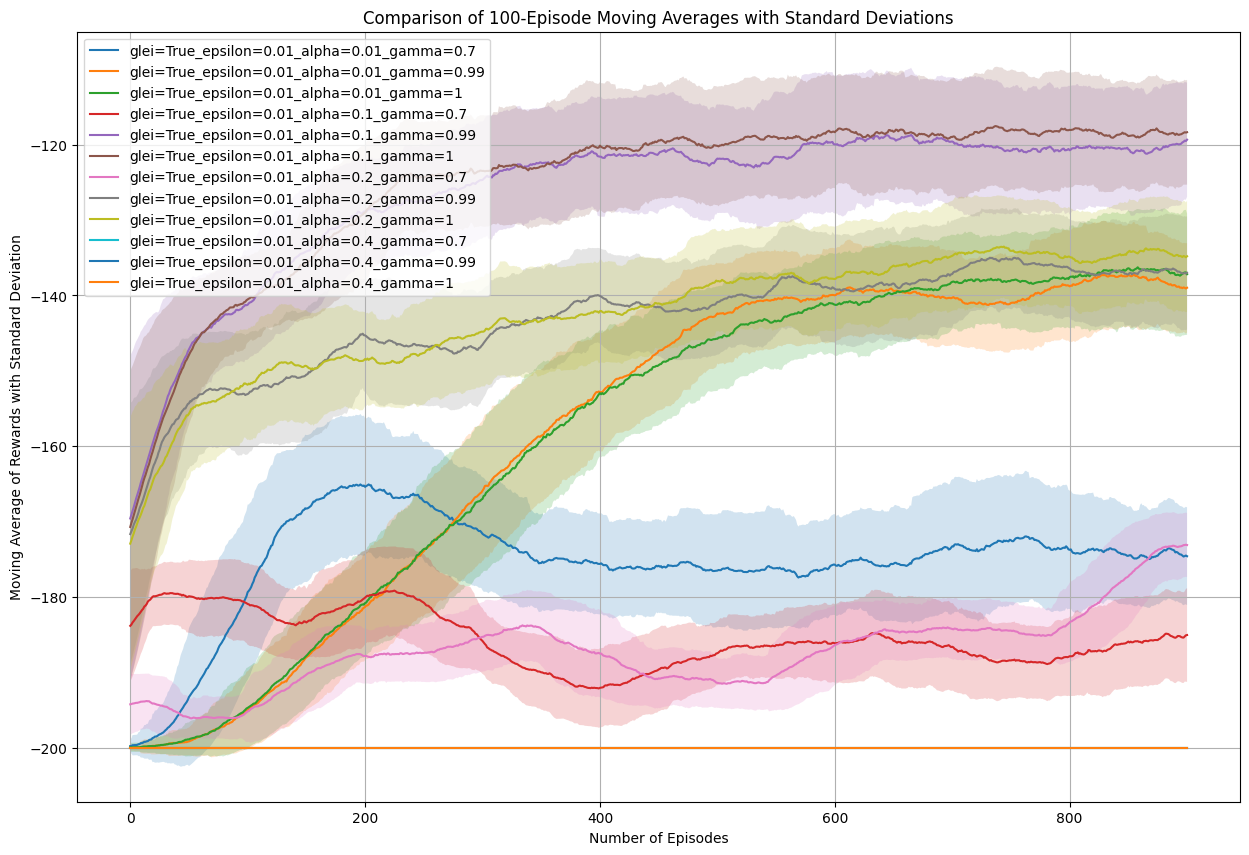

In [4]:
process_json(
    "./data/q_learning/ql_alpha_gamma_search_epsilon=0.01_glei=true",
    "w",
    data_dict=ql_alpha_gamma_tune_historic,
)
plot_moving_averages(ql_alpha_gamma_tune_historic, nb_episodes=1000, window_size=100)

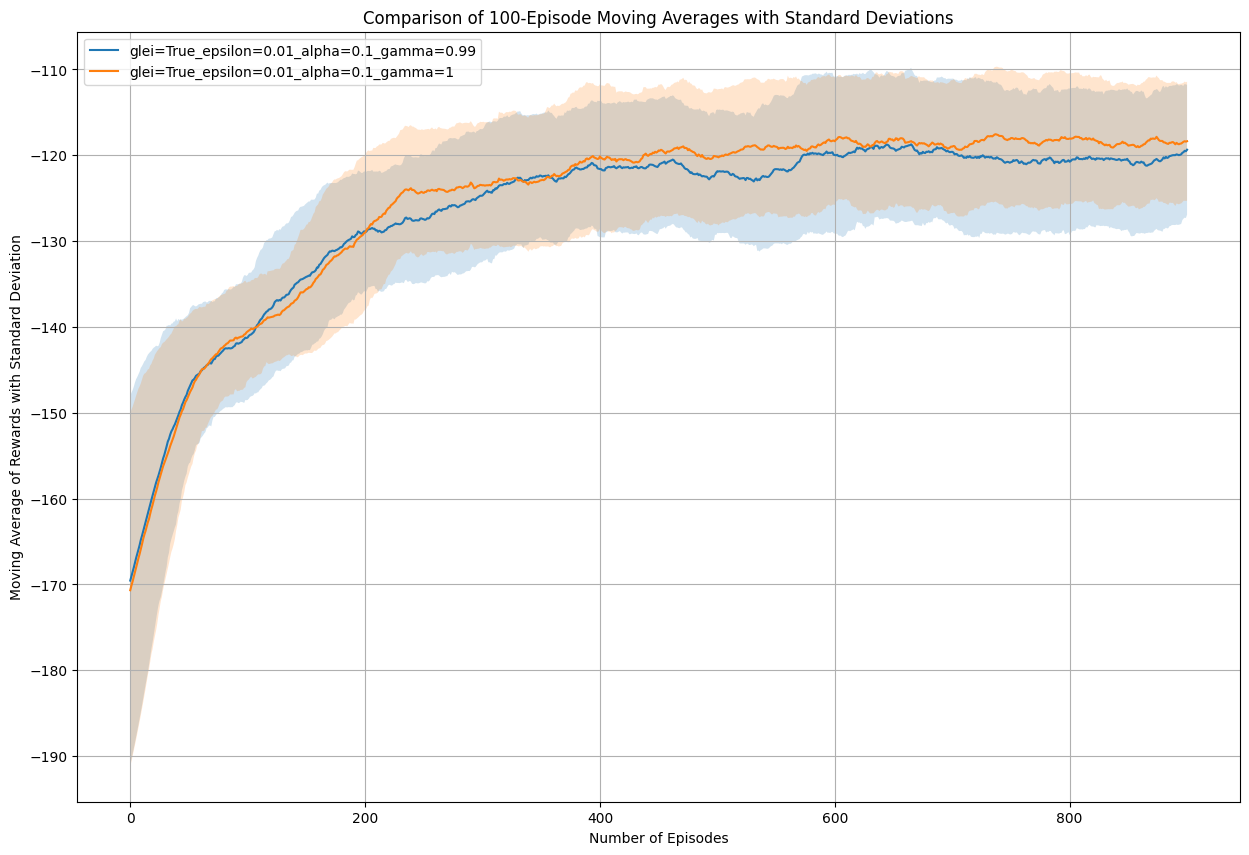

In [9]:
eps01_1 = process_json(
    "./data/q_learning/ql_alpha_gamma_search_epsilon=0.01_glei=true",
    "r",
).get("glei=True_epsilon=0.01_alpha=0.1_gamma=0.99")

eps01_2 = process_json(
    "./data/q_learning/ql_alpha_gamma_search_epsilon=0.01_glei=true",
    "r",
).get("glei=True_epsilon=0.01_alpha=0.1_gamma=1")

plot_moving_averages(
    rewards_dict={
        "glei=True_epsilon=0.01_alpha=0.1_gamma=0.99": eps01_1,
        "glei=True_epsilon=0.01_alpha=0.1_gamma=1": eps01_2,
    },
    nb_episodes=1000,
    window_size=100,
)